## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке.

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее.

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф.
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет.


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

import gdown
import os

# Создаем папку для данных, если она не существует
os.makedirs("data", exist_ok=True)

# Ссылки на файлы
urls = {
    "weather_data": "https://drive.google.com/uc?id=1MOGFkrHDbt9qU6GrGl5waOwYrHgj2Ctt",
    "train": "https://drive.google.com/uc?id=1bBF2L41EgntTL7n4HNoNVBGsJ328Lk3-",
    "osrm_data_train": "https://drive.google.com/uc?id=1tdQvrpnbfSGLehvnCihyy4EnFslk5NMX",
    "holiday_data": "https://drive.google.com/uc?id=1ov8lhWeSbdKTBKjGUiNImLzyjSZfOMsM"
}

# Загрузка файлов
for name, url in urls.items():
    try:
        gdown.download(url, f"data/{name}.csv", quiet=False)
    except Exception as e:
        print(f"Ошибка при загрузке {name}: {e}")

# Теперь вы можете загружать данные из загруженных файлов
try:
    taxi_data = pd.read_csv("data/train.csv")
    weather_data = pd.read_csv("data/weather_data.csv")
    osrm_data = pd.read_csv("data/osrm_data_train.csv")
    holiday_data = pd.read_csv("data/holiday_data.csv")

    print('Train data shape: {}'.format(taxi_data.shape))
    print('Weather data shape: {}'.format(weather_data.shape))
    print('OSRM data shape: {}'.format(osrm_data.shape))
    print('Holiday data shape: {}'.format(holiday_data.shape))
except FileNotFoundError as e:
    print(f"Ошибка: файл не найден. {e}")
except Exception as e:
    print(f"Ошибка при чтении данных: {e}")


Downloading...
From: https://drive.google.com/uc?id=1MOGFkrHDbt9qU6GrGl5waOwYrHgj2Ctt
To: /content/data/weather_data.csv
100%|██████████| 842k/842k [00:00<00:00, 74.3MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1bBF2L41EgntTL7n4HNoNVBGsJ328Lk3-
From (redirected): https://drive.google.com/uc?id=1bBF2L41EgntTL7n4HNoNVBGsJ328Lk3-&confirm=t&uuid=bdc7ab2c-bdd9-415a-b170-8b3bbc788a2d
To: /content/data/train.csv
100%|██████████| 201M/201M [00:04<00:00, 42.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1tdQvrpnbfSGLehvnCihyy4EnFslk5NMX
From (redirected): https://drive.google.com/uc?id=1tdQvrpnbfSGLehvnCihyy4EnFslk5NMX&confirm=t&uuid=51e2c7b9-c3ca-4c53-b9e8-2225e8ac472d
To: /content/data/osrm_data_train.csv
100%|██████████| 736M/736M [00:21<00:00, 34.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ov8lhWeSbdKTBKjGUiNImLzyjSZfOMsM
To: /content/data/holiday_data.csv
100%|██████████| 508/508 [00:00<00:00, 1.34MB/s]


Train data shape: (1458644, 11)
Weather data shape: (8787, 16)
OSRM data shape: (1458643, 12)
Holiday data shape: (14, 1)


Прочитаем наш файл с исходными данными:

In [106]:
taxi_data = pd.read_csv("data/train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок.

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу.

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S').

Определите временные рамки (без учета времени), за которые представлены данные.

In [107]:
# преобразуем временные признаки в правильный формат с помощью функции to_datetime()
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
taxi_data['dropoff_datetime'] = pd.to_datetime(taxi_data['dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

print('Presented period pickup: {} - {}'.format(taxi_data['pickup_datetime'].dt.date.min(), taxi_data['pickup_datetime'].dt.date.max()))
print('Presented period dropoff: {} - {}'.format(taxi_data['dropoff_datetime'].dt.date.min(), taxi_data['dropoff_datetime'].dt.date.max()))
pd.to_datetime
min, max

taxi_data.isna().sum()

print(taxi_data.describe(include=['object']).T)
np.round(taxi_data.describe().T, 2)

Presented period pickup: 2016-01-01 - 2016-06-30
Presented period dropoff: 2016-01-01 - 2016-07-01
                      count   unique        top     freq
id                  1458644  1458644  id2875421        1
store_and_fwd_flag  1458644        2          N  1450599


count                           mean  \
vendor_id          1458644.0                        1.53495   
pickup_datetime      1458644  2016-04-01 10:10:24.940037120   
dropoff_datetime     1458644  2016-04-01 10:26:24.432310528   
passenger_count    1458644.0                        1.66453   
pickup_longitude   1458644.0                     -73.973486   
pickup_latitude    1458644.0                      40.750921   
dropoff_longitude  1458644.0                     -73.973416   
dropoff_latitude   1458644.0                        40.7518   
trip_duration      1458644.0                     959.492273   

                                   min                            25%  \
vendor_id                          1.0                            1.0   
pickup_datetime    2016-01-01 00:00:17  2016-02-17 16:46:04.249999872   
dropoff_datetime   2016-01-01 00:03:31     2016-02-17 17:05:32.500000   
passenger_count                    0.0                            1.0   
pickup_longitude           -121.933342                     -73.991867   
pickup_latitude              34.359695                      40.737347   
dropoff_longitude          -121.933304                     -73.991325   
dropoff_latitude             32.181141                      40.735885   
trip_duration                      1.0                          397.0   

                                   50%                            75%  \
vendor_id                          2.0                            2.0   
pickup_datetime    2016-04-01 17:19:40  2016-05-15 03:56:08.750000128   
dropoff_datetime   2016-04-01 17:35:12  2016-05-15 04:10:51.750000128   
passenger_count                    1.0                            2.0   
pickup_longitude            -73.981743                     -73.967331   
pickup_latitude              40.754101                       40.76836   
dropoff_longitude           -73.979752                     -73.963013   
dropoff_latitude             40.754524                       40.76981   
trip_duration                    662.0                         1075.0   

                                   max          std  
vendor_id                          2.0     0.498777  
pickup_datetime    2016-06-30 23:59:39          NaN  
dropoff_datetime   2016-07-01 23:02:03          NaN  
passenger_count                    9.0     1.314242  
pickup_longitude            -61.335529     0.070902  
pickup_latitude              51.881084     0.032881  
dropoff_longitude           -61.335529     0.070643  
dropoff_latitude             43.921028     0.035891  
trip_duration                3526282.0  5237.431724

### Задание 2.2
Посмотрим на пропуски.
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [108]:
taxi_data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков.

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [109]:
print(taxi_data.describe(include=['object']).T)
np.round(taxi_data.describe().T, 2)

                      count   unique        top     freq
id                  1458644  1458644  id2875421        1
store_and_fwd_flag  1458644        2          N  1450599


count                           mean  \
vendor_id          1458644.0                        1.53495   
pickup_datetime      1458644  2016-04-01 10:10:24.940037120   
dropoff_datetime     1458644  2016-04-01 10:26:24.432310528   
passenger_count    1458644.0                        1.66453   
pickup_longitude   1458644.0                     -73.973486   
pickup_latitude    1458644.0                      40.750921   
dropoff_longitude  1458644.0                     -73.973416   
dropoff_latitude   1458644.0                        40.7518   
trip_duration      1458644.0                     959.492273   

                                   min                            25%  \
vendor_id                          1.0                            1.0   
pickup_datetime    2016-01-01 00:00:17  2016-02-17 16:46:04.249999872   
dropoff_datetime   2016-01-01 00:03:31     2016-02-17 17:05:32.500000   
passenger_count                    0.0                            1.0   
pickup_longitude           -121.933342                     -73.991867   
pickup_latitude              34.359695                      40.737347   
dropoff_longitude          -121.933304                     -73.991325   
dropoff_latitude             32.181141                      40.735885   
trip_duration                      1.0                          397.0   

                                   50%                            75%  \
vendor_id                          2.0                            2.0   
pickup_datetime    2016-04-01 17:19:40  2016-05-15 03:56:08.750000128   
dropoff_datetime   2016-04-01 17:35:12  2016-05-15 04:10:51.750000128   
passenger_count                    1.0                            2.0   
pickup_longitude            -73.981743                     -73.967331   
pickup_latitude              40.754101                       40.76836   
dropoff_longitude           -73.979752                     -73.963013   
dropoff_latitude             40.754524                       40.76981   
trip_duration                    662.0                         1075.0   

                                   max          std  
vendor_id                          2.0     0.498777  
pickup_datetime    2016-06-30 23:59:39          NaN  
dropoff_datetime   2016-07-01 23:02:03          NaN  
passenger_count                    9.0     1.314242  
pickup_longitude            -61.335529     0.070902  
pickup_latitude              51.881084     0.032881  
dropoff_longitude           -61.335529     0.070643  
dropoff_latitude             43.921028     0.035891  
trip_duration                3526282.0  5237.431724

Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками.


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - наименование дня недели, в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [110]:
def add_datetime_features(data):
    """
    Добавляет новые признаки на основе столбца 'pickup_datetime'.

    Признаки:
    - 'pickup_date': дата, когда произошла поездка.
    - 'pickup_hour': час, когда произошла поездка.
    - 'pickup_day_of_week': день недели, когда произошла поездка (0 - понедельник, 6 - воскресенье).

    Параметры:
    data (DataFrame): Входные данные в формате pandas DataFrame, содержащие столбец 'pickup_datetime'.

    Возвращает:
    DataFrame: Обновленный DataFrame с добавленными признаками.
    """
    # применим атрибуты date, hour и dayofweek функции datetime(dt) к признаку 'pickup_datetime'
    data['pickup_date'] = data['pickup_datetime'].dt.date
    data['pickup_hour'] = data['pickup_datetime'].dt.hour
    data['pickup_day_of_week'] = data['pickup_datetime'].dt.dayofweek
    return data

# применяем функцию
add_datetime_features(taxi_data)

# проверка преобразования
print(taxi_data[['pickup_date', 'pickup_hour', 'pickup_day_of_week']].head())
print('Quantity of trips daily:', np.round(taxi_data['pickup_date'].count() / taxi_data['pickup_date'].nunique()))



  pickup_date  pickup_hour  pickup_day_of_week
0  2016-03-14           17                   0
1  2016-06-12            0                   6
2  2016-01-19           11                   1
3  2016-04-06           19                   2
4  2016-03-26           13                   5
Quantity of trips daily: 8015.0


### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет).

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [111]:

# загружаем файл с праздничными датами
holiday_data = pd.read_csv('data/holiday_data.csv', sep=';')

def add_holiday_features(data1, data2):
    """
    Добавляет признак, указывающий, является ли дата поездки праздничным днем.

    Признак:
    - 'pickup_holiday': 1, если дата поездки совпадает с праздничным днем, иначе 0.

    Параметры:
    data1 (DataFrame): Входные данные в формате pandas DataFrame, содержащие столбец 'pickup_date'.
    data2 (DataFrame): DataFrame, содержащий столбец 'date' с праздничными датами.

    Возвращает:
    DataFrame: Обновленный DataFrame с добавленным признаком 'pickup_holiday'.
    """
    # преобразуем столбец датафрейма с праздниками в список
    holidays = data2['date'].tolist()
    # если дата поездки в такси совпадает с датой из списка, то определяем значение как 1, если нет - 0
    data1['pickup_holiday'] = data1['pickup_date'].apply(lambda x: 1 if str(x) in holidays else 0)
    return data1

# применим функцию
add_holiday_features(taxi_data, holiday_data)

# проверим, сколько поездок было в рабочие дни (0) и праздничные дни (1)
print('Quantity of trips in working days (0, %) and holidays (1, %): ',
      taxi_data['pickup_holiday'].value_counts() * 100 / len(taxi_data), sep='\n')


Quantity of trips in working days (0, %) and holidays (1, %): 
pickup_holiday
0    96.495238
1     3.504762
Name: count, dtype: float64


### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM?

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника.

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [112]:


# создаем список столбцов, которые необходимо нам подгрузить из источника
cols = ['id', 'total_distance', 'total_travel_time', 'number_of_steps']
osrm_data = pd.read_csv('data/osrm_data_train.csv', usecols = cols)
osrm_data.head()

def add_osrm_features(data1, data2):
    """
    Присоединяет новые столбцы к датасету о поездках на основе общего признака 'id'.

    Параметры:
    data1 (DataFrame): Входные данные в формате pandas DataFrame, содержащие информацию о поездках.
    data2 (DataFrame): DataFrame, содержащий дополнительные данные, которые нужно присоединить.

    Возвращает:
    DataFrame: Обновленный DataFrame с добавленными столбцами из data2.
    """
    # к датасету о поездках присоединяем новые столбцы по общему признаку id
    data = data1.merge(data2, on='id', how='left')
    return data

# применим функцию
taxi_data = add_osrm_features(taxi_data, osrm_data)

# выводим первые несколько строк обновленного DataFrame
taxi_data.head()



id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration pickup_date  \
0         40.765602                  N            455  2016-03-14   
1         40.731152                  N            663  2016-06-12   
2         40.710087                  N           2124  2016-01-19   
3         40.706718                  N            429  2016-04-06   
4         40.782520                  N            435  2016-03-26   

   pickup_hour  pickup_day_of_week  pickup_holiday  total_distance  \
0           17                   0               0          2009.1   
1            0                   6               0          2513.2   
2           11                   1               0         11060.8   
3           19                   2               0          1779.4   
4           13                   5               0          1614.9   

   total_travel_time  number_of_steps  
0              164.9              5.0  
1              332.0              6.0  
2              767.6             16.0  
3              235.8              4.0  
4              140.1              5.0

In [113]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    """
    Вычисляет расстояние между двумя точками на поверхности Земли по формуле Хаверсина.

    Параметры:
    lat1 (float): Широта первой точки в градусах.
    lng1 (float): Долгота первой точки в градусах.
    lat2 (float): Широта второй точки в градусах.
    lng2 (float): Долгота второй точки в градусах.

    Возвращает:
    float: Расстояние между двумя точками в километрах.
    """
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус Земли в километрах
    EARTH_RADIUS = 6371
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    """
    Вычисляет угол направления движения между двумя точками на поверхности Земли.

    Параметры:
    lat1 (float): Широта первой точки в градусах.
    lng1 (float): Долгота первой точки в градусах.
    lat2 (float): Широта второй точки в градусах.
    lng2 (float): Долгота второй точки в градусах.

    Возвращает:
    float: Угол направления в градусах (относительно северного направления).
    """
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha


### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [114]:
def add_geographical_features(data):
    """
    Добавляет географические признаки в DataFrame, вычисляя расстояние Хаверсина и угол направления.

    Параметры:
    data (DataFrame): Входные данные в формате pandas DataFrame, содержащие столбцы с координатами:
                      'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'.

    Возвращает:
    DataFrame: Обновленный DataFrame с добавленными признаками 'haversine_distance' и 'direction'.
    """
    # применим созданные ранее функции вычисления
    data['haversine_distance'] = get_haversine_distance(
        data['pickup_latitude'],
        data['pickup_longitude'],
        data['dropoff_latitude'],
        data['dropoff_longitude']
    )

    data['direction'] = get_angle_direction(
        data['pickup_latitude'],
        data['pickup_longitude'],
        data['dropoff_latitude'],
        data['dropoff_longitude']
    )

    return data

# применим функцию
taxi_data = add_geographical_features(taxi_data)

# проверяем добавление новых признаков
taxi_data[['haversine_distance', 'direction']].head()



haversine_distance   direction
0            1.498521   99.970196
1            1.805507 -117.153768
2            6.385098 -159.680165
3            1.485498 -172.737700
4            1.188588  179.473585

### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [115]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)


def add_cluster_features(data):
    """
    Добавляет кластерные признаки в DataFrame, используя алгоритм KMeans для географических координат.

    Параметры:
    data (DataFrame): Входные данные в формате pandas DataFrame, содержащие столбцы с координатами:
                      'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'.

    Возвращает:
    DataFrame: Обновленный DataFrame с добавленным признаком 'geo_cluster', указывающим на кластер.
    """
    # создаем обучающую выборку из географических координат всех точек
    coords = np.hstack((
        data[['pickup_latitude', 'pickup_longitude']],
        data[['dropoff_latitude', 'dropoff_longitude']]
    ))

    # обучаем алгоритм кластеризации
    kmeans = cluster.KMeans(n_clusters=10, random_state=42)
    kmeans.fit(coords)

    # делаем предсказание
    predictions = kmeans.predict(coords)

    # создаем новый признак на основе предсказаний
    data['geo_cluster'] = predictions
    return data

# применим функцию
taxi_data = add_cluster_features(taxi_data)

# посмотрим на распределение поездок по кластерам
taxi_data['geo_cluster'].value_counts()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


geo_cluster
0    596467
9    383874
4    359233
5     43619
7     41171
3     27022
1      7233
6        18
8         5
2         2
Name: count, dtype: int64

### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки.

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [116]:


columns = ['time', 'temperature', 'visibility', 'wind speed', 'precip', 'events']
weather_data = pd.read_csv('data/weather_data.csv')
weather_data.head()

# преобразуем признак 'time' из типа object в нужный формат времени datetime
weather_data['time'] = pd.to_datetime(weather_data['time'])
def add_weather_features(data1, data2):
    # с помощью атрибутов datetime отделяем дату и час в отдельные столбцы
    data2['date'] = data2['time'].dt.date
    data2['hour'] = data2['time'].dt.hour
    data = data1.merge(data2, left_on=['pickup_date', 'pickup_hour'], right_on=['date', 'hour'], how='left')
    return data.drop(['time', 'date', 'hour'], axis=1)
# применим функцию
taxi_data = add_weather_features(taxi_data, weather_data)
taxi_data.head()



id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  ...  humidity pressure  dew Point  \
0         40.765602                  N  ...      0.86   1017.5        2.2   
1         40.731152                  N  ...      0.53   1006.6       18.3   
2         40.710087                  N  ...      0.46   1016.3      -16.7   
3         40.706718                  N  ...      0.39   1019.1       -6.1   
4         40.782520                  N  ...      0.46   1026.9       -1.7   

   visibility  wind dir  wind speed  gust speed  precip  events  conditions  
0         8.0       ENE        27.8        57.4     0.3     NaN    Overcast  
1        16.1      West         7.4         0.0     0.0     NaN     Unknown  
2        16.1      West        24.1        46.3     0.0     NaN       Clear  
3        16.1     South        25.9        35.2     0.0     NaN       Clear  
4        16.1  Variable         9.3         0.0     0.0     NaN       Clear  

[5 rows x 34 columns]

## Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски.
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана).

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам.

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [117]:
null_in_data = taxi_data.isnull().sum()
print('Features witn null: ', null_in_data[null_in_data > 0], sep='\n')
def fill_null_weather_data(data):
    cols = ['temperature', 'visibility', 'wind speed', 'precip']
    for col in cols:
        # сгруппируем данные по столбцу pickup_date (дата начала поездки) и рассчитаем медиану в каждой группе
        # заполним пропуски с помощью функции fillna()
        data[col] = data[col].fillna(data.groupby('pickup_date')[col].transform('median'))
    data['events'] = data['events'].fillna('None')
    cols2 = ['total_distance', 'total_travel_time', 'number_of_steps']
    for col in cols2:
        data[col] = data[col].fillna(data[col].median())
    return data

# применим функцию
fill_null_weather_data(taxi_data)


Features witn null: 
total_distance             1
total_travel_time          1
number_of_steps            1
temperature            12032
windchill             977900
heat index           1412890
humidity               12032
pressure               56031
dew Point              12032
visibility             12032
wind dir               12032
wind speed             12032
gust speed             12032
precip                 12032
events               1387217
conditions             12032
dtype: int64


id  vendor_id     pickup_datetime    dropoff_datetime  \
0        id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1        id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2        id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3        id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4        id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   
...            ...        ...                 ...                 ...   
1458639  id2376096          2 2016-04-08 13:31:04 2016-04-08 13:44:02   
1458640  id1049543          1 2016-01-10 07:35:15 2016-01-10 07:46:10   
1458641  id2304944          2 2016-04-22 06:57:41 2016-04-22 07:10:25   
1458642  id2714485          1 2016-01-05 15:56:26 2016-01-05 16:02:39   
1458643  id1209952          1 2016-04-05 14:44:25 2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  ...  \
0               -73.964630         40.765602                  N  ...   
1               -73.999481         40.731152                  N  ...   
2               -74.005333         40.710087                  N  ...   
3               -74.012268         40.706718                  N  ...   
4               -73.972923         40.782520                  N  ...   
...                    ...               ...                ...  ...   
1458639         -73.994911         40.740170                  N  ...   
1458640         -73.970184         40.796547                  N  ...   
1458641         -74.004433         40.707371                  N  ...   
1458642         -73.974632         40.757107                  N  ...   
1458643         -73.972809         40.790585                  N  ...   

         humidity pressure  dew Point  visibility  wind dir  wind speed  \
0            0.86   1017.5        2.2         8.0       ENE        27.8   
1            0.53   1006.6       18.3        16.1      West         7.4   
2            0.46   1016.3      -16.7        16.1      West        24.1   
3            0.39   1019.1       -6.1        16.1     South        25.9   
4            0.46   1026.9       -1.7        16.1  Variable         9.3   
...           ...      ...        ...         ...       ...         ...   
1458639      0.44   1002.5       -3.9        16.1  Variable        11.1   
1458640      0.90   1007.8        5.6         2.8       ENE        18.5   
1458641      0.54   1013.5        8.9        16.1      Calm         0.0   
1458642      0.24   1035.1      -21.1        16.1  Variable         9.3   
1458643      0.27   1026.8      -15.0        16.1        NE        16.7   

         gust speed  precip  events  conditions  
0              57.4     0.3    None    Overcast  
1               0.0     0.0    None     Unknown  
2              46.3     0.0    None       Clear  
3              35.2     0.0    None       Clear  
4               0.0     0.0    None       Clear  
...             ...     ...     ...         ...  
1458639        33.3     0.0    None    Overcast  
1458640        35.2     8.1    Rain        Rain  
1458641         0.0     0.0    None       Clear  
1458642         0.0     0.0    None       Clear  
1458643        29.6     0.0    None       Clear  

[1458644 rows x

В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки.

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа.

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды.
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом:
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


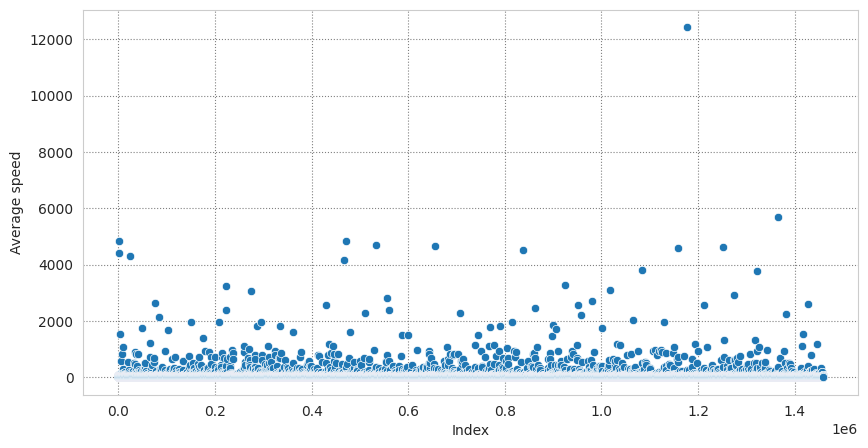

In [118]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч!

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч.


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных.

б) Сколько выбросов по признаку скорости вам удалось найти?

In [119]:
# определим поездки продолжительностью более 24 часов
duration_mask = taxi_data['trip_duration'] > (60*60*24)
print('Taxi trips over 24 hours: ', *taxi_data[duration_mask].index)
# посмотрим количество поездок со скоростью более 300км/час
print('Speed of taxis over 300km/hours: ', len(taxi_data[avg_speed > 300].index))

3600*24

taxi_data = taxi_data[(avg_speed < 300)&(taxi_data['trip_duration'] < (60*60*24))]
taxi_data.drop(['id', 'store_and_fwd_flag', 'pickup_holiday'], axis=1, inplace=True)
taxi_data.shape





Taxi trips over 24 hours:  355003 680594 924150 978383
Speed of taxis over 300km/hours:  407


<ipython-input-119-917b614979dc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_data.drop(['id', 'store_and_fwd_flag', 'pickup_holiday'], axis=1, inplace=True)


(1458233, 31)

## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных;
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [120]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

<ipython-input-120-05c7fca4680a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)


### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log).
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным?
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$.

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

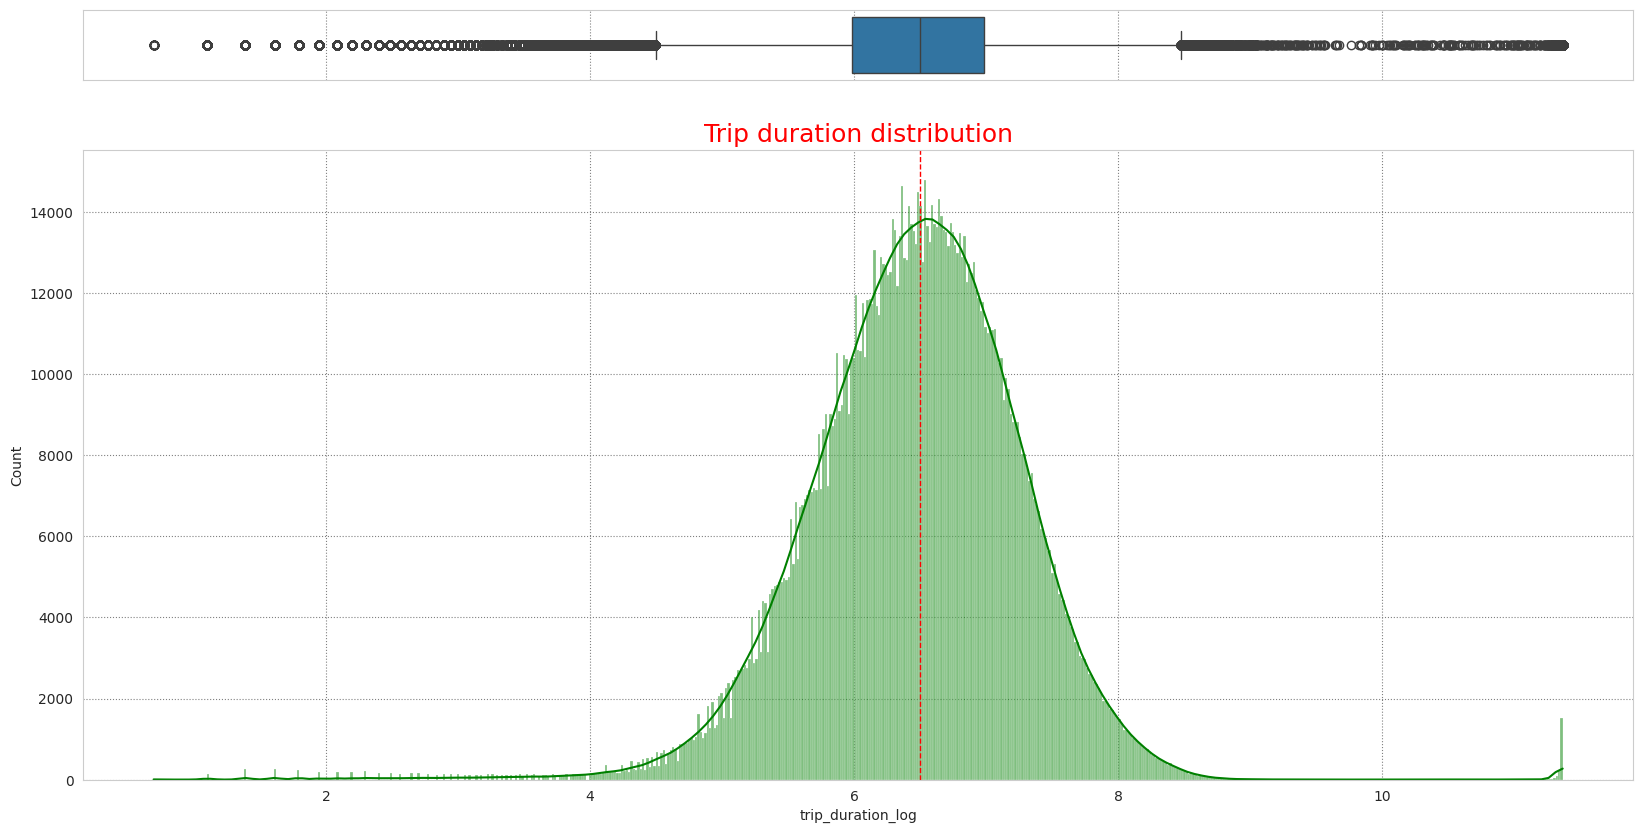

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


In [121]:
sns.set_style("whitegrid", {"grid.color": ".5", "grid.linestyle": ":"})
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':{.10, .90}}, figsize = (20, 10)) # задаем размер координатной плоскости и соотношение графиков
# коробчатая диаграмма
sns.boxplot(taxi_data['trip_duration_log'], orient="h", ax=ax_box)
# гистограмма
sns.histplot(taxi_data['trip_duration_log'], kde=True, color='green', ax=ax_hist)
ax_hist.axvline(taxi_data['trip_duration_log'].median(), color='red', linestyle='--', linewidth=1) # отобразим медианное значение
plt.title('Trip duration distribution', fontsize=18, color='r')
plt.show()

# задаем уровень значимости для проведения статистического теста
alpha = 0.05
__, p_v = stats.normaltest(taxi_data['trip_duration_log'])
print('p-value = {:.3f}'.format(p_v))
if p_v <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))

### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id).

Сравните два распределения между собой.

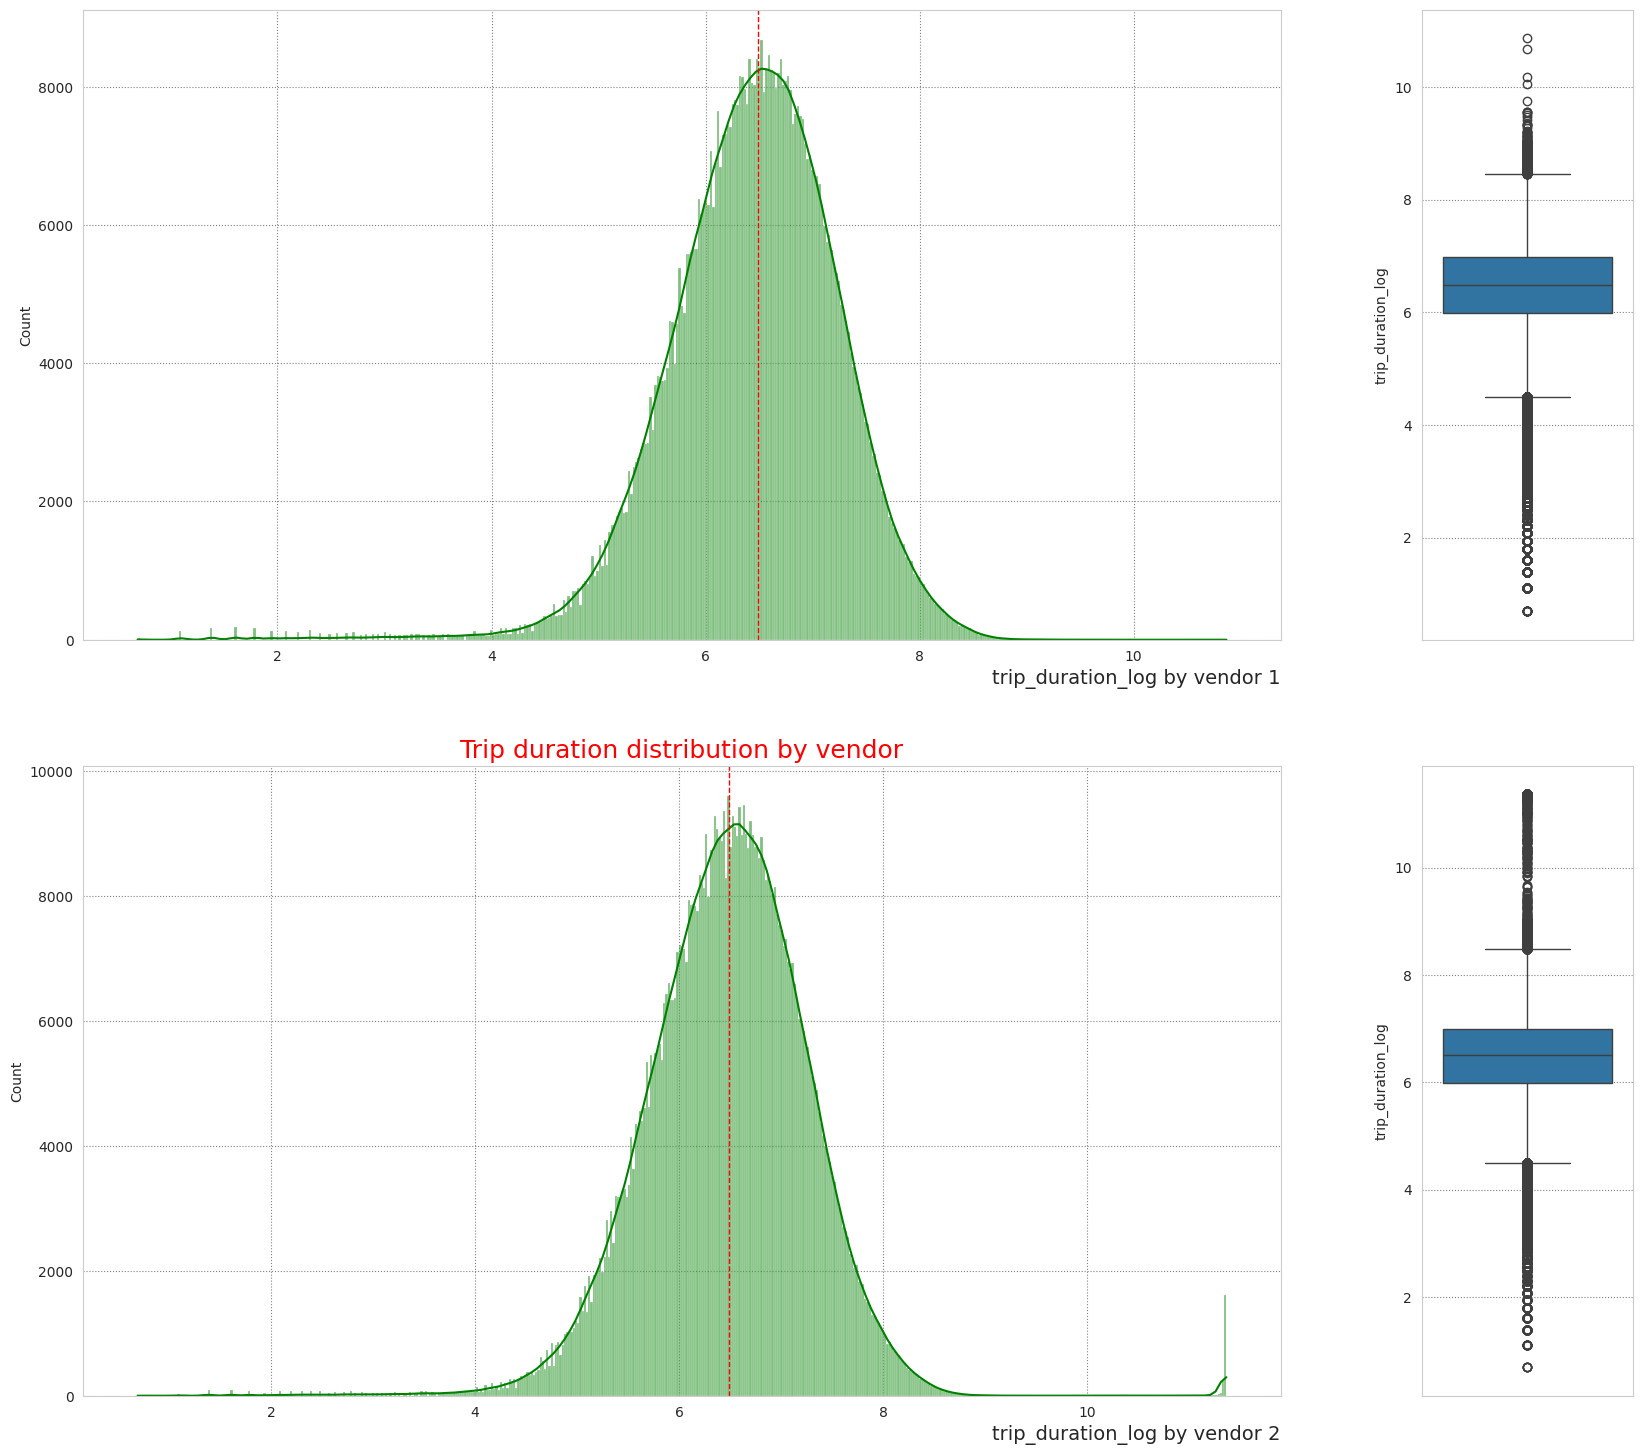

In [122]:
fig, ax = plt.subplots(2, 2, figsize=(20, 18), gridspec_kw={'width_ratios':{.85, .15}})
# гистограмма распределения таксопарка №1
sns.histplot(x=taxi_data[taxi_data['vendor_id']==1]['trip_duration_log'], kde=True, color='green', ax = ax[0][0])
ax[0][0].set_xlabel('trip_duration_log by vendor 1', loc='right', fontsize=14)
ax[0][0].axvline(taxi_data[taxi_data['vendor_id']==1]['trip_duration_log'].median(), color='red', linestyle='--', linewidth=1) # отобразим медианное значение
# коробчатая диаграмма 'trip_duration_log' & 'vendor_id'=1
sns.boxplot(taxi_data[taxi_data['vendor_id']==1]['trip_duration_log'], orient='v', ax=ax[0][1])
# гистограмма распределения таксопарка №2
sns.histplot(x=taxi_data[taxi_data['vendor_id']==2]['trip_duration_log'], kde=True, color='green', ax=ax[1][0])
ax[1][0].set_xlabel('trip_duration_log by vendor 2', loc='right', fontsize=14)
ax[1][0].axvline(taxi_data[taxi_data['vendor_id']==1]['trip_duration_log'].median(), color='red', linestyle='--', linewidth=1) # отобразим медианное значение
ax[1][0].set_title('Trip duration distribution by vendor', loc='center', fontsize=18, color='r')
sns.boxplot(taxi_data[taxi_data['vendor_id']==2]['trip_duration_log'], orient='v', ax=ax[1][1])
plt.show()

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag).

Сравните два распределения между собой.

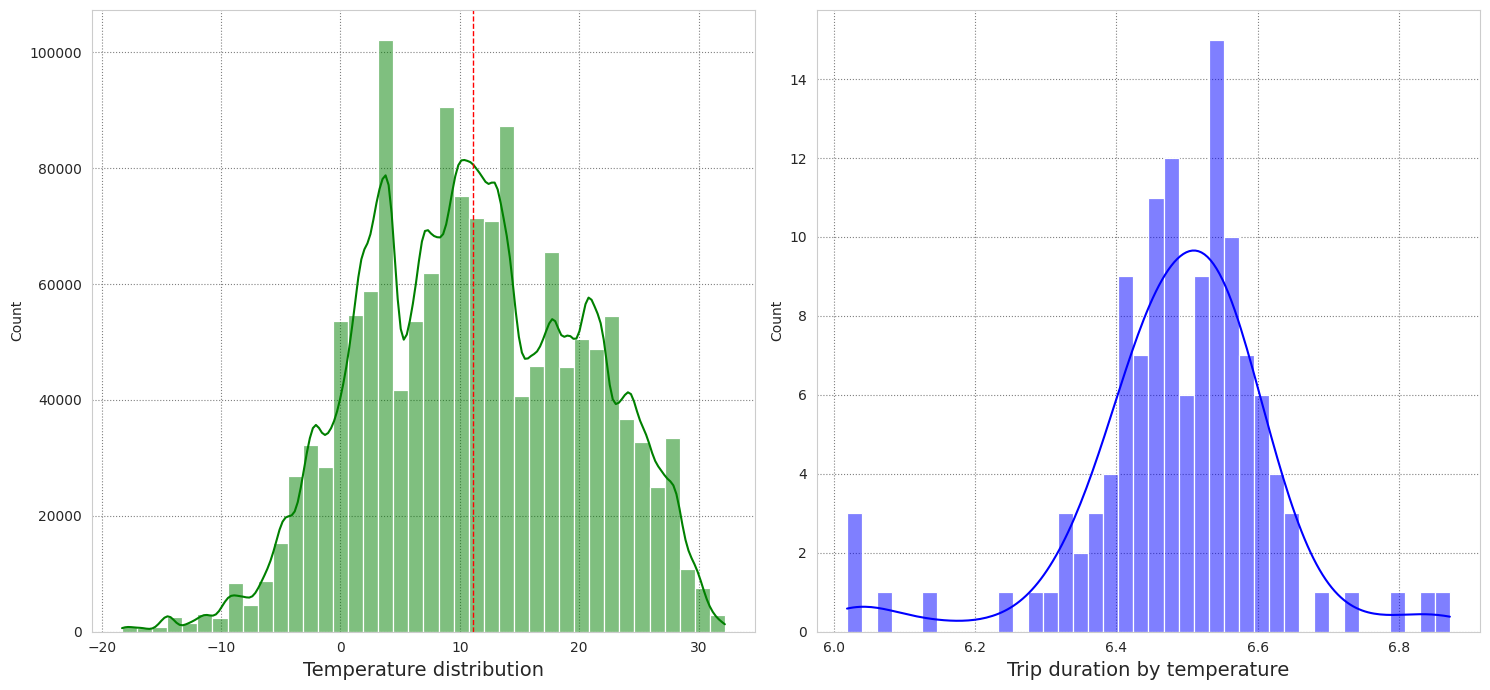

In [123]:
temp = taxi_data.groupby('temperature')['trip_duration_log'].median()
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
# гистограмма распределения температуры
sns.histplot(taxi_data, x='temperature', kde=True, color='green', bins=40, ax = ax[0])
ax[0].set_xlabel('Temperature distribution', fontsize=14)
ax[0].axvline(taxi_data['temperature'].median(), color='red', linestyle='--', linewidth=1) # отобразим медианное значение
# гистограмма распредлениея температуры
sns.histplot(temp, bins=40, color='blue', kde=True, ax = ax[1])
ax[1].set_xlabel('Trip duration by temperature', fontsize=14)
plt.tight_layout()
plt.show()

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

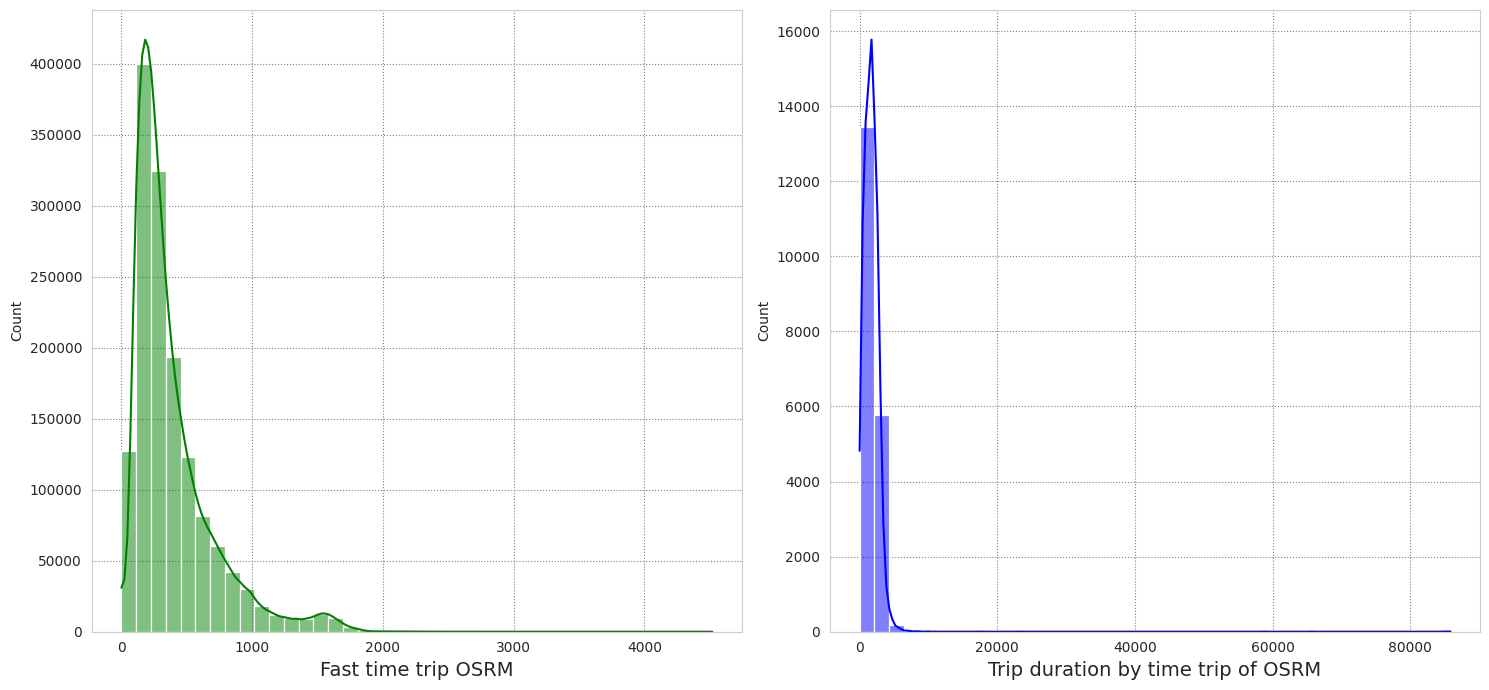

In [124]:
time_trip = taxi_data.groupby('total_travel_time')['trip_duration'].median()
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
# гистограмма распределения наименьшего времени в пути согласно OSRM
sns.histplot(taxi_data, x='total_travel_time', kde=True, color='green', bins=40, ax = ax[0])
ax[0].set_xlabel('Fast time trip OSRM', fontsize=14)
# гистограмма распределения продолжительности поездки согласно времени, расчитанному OSRM
sns.histplot(time_trip, bins=40, color='blue', kde=True, ax = ax[1])
ax[1].set_xlabel('Trip duration by time trip of OSRM', fontsize=14)
plt.tight_layout()
plt.show()

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


<ipython-input-125-7f447e6fe38f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(taxi_data, x='pickup_hour', palette='bright', ax=ax[0])
<ipython-input-125-7f447e6fe38f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(taxi_data, x='pickup_hour', y='trip_duration', estimator='median', palette='bright', ax=ax[1])


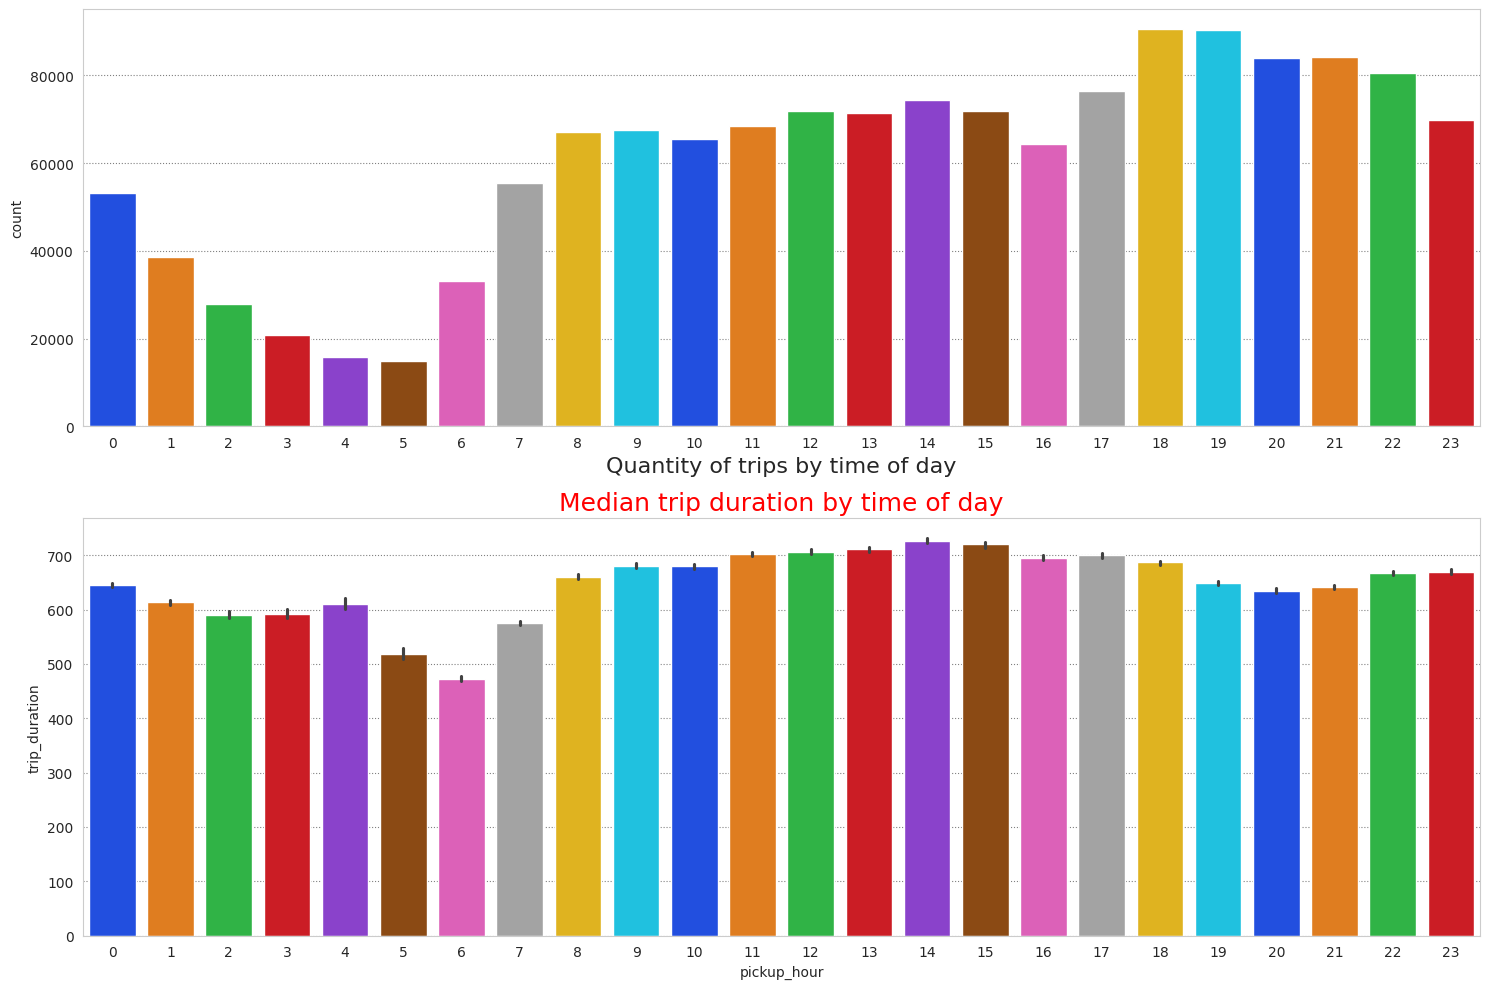

In [125]:
fig, ax = plt.subplots(2, figsize=(15, 10))
# количественная столбчатая диаграмма признака pickup_hour
sns.countplot(taxi_data, x='pickup_hour', palette='bright', ax=ax[0])
ax[0].set_xlabel('Quantity of trips by time of day', fontsize=16)
# столбчатая диаграмма продолжительности поездки в зависимости от времени суток
sns.barplot(taxi_data, x='pickup_hour', y='trip_duration', estimator='median', palette='bright', ax=ax[1])
plt.title('Median trip duration by time of day', fontsize=18, color='r')
plt.tight_layout()
plt.show()

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно.

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration).

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

<ipython-input-126-13b5bc645213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(taxi_data, x='pickup_day_of_week', palette='bright', ax=ax[0])
<ipython-input-126-13b5bc645213>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
<ipython-input-126-13b5bc645213>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(taxi_data, x='pickup_day_of_week', y='trip_duration', estimator='median', palette='bright', ax=ax[1])
<ipython-input-126-13b5bc645213>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(['Monday', 'Tuesd

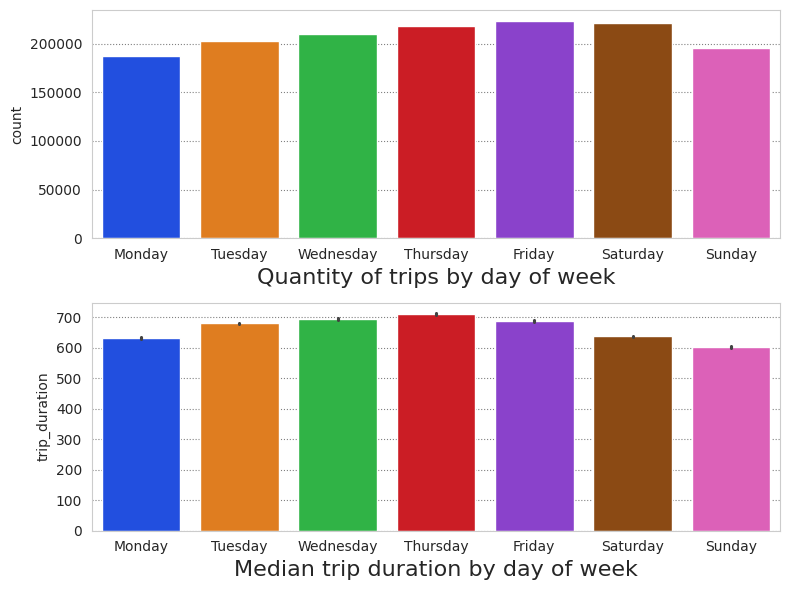

In [126]:
fig, ax = plt.subplots(2, figsize=(8, 6))
# количественная столбчатая диаграмма признака pickup_day_of_week
sns.countplot(taxi_data, x='pickup_day_of_week', palette='bright', ax=ax[0])
ax[0].set_xlabel('Quantity of trips by day of week', fontsize=16)
ax[0].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# столбчатая диаграмма продолжительности поездки в зависимости от дня недели
sns.barplot(taxi_data, x='pickup_day_of_week', y='trip_duration', estimator='median', palette='bright', ax=ax[1])
ax[1].set_xlabel('Median trip duration by day of week', fontsize=16)
ax[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.tight_layout()
plt.show()

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude)
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude).
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:

city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее.

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


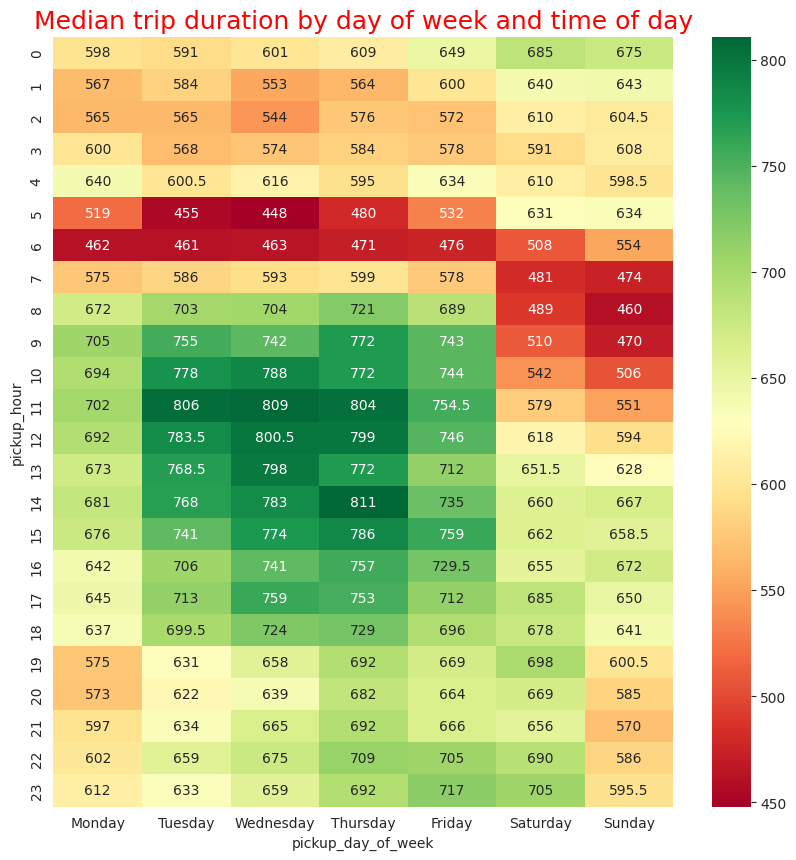

<ipython-input-127-6401d9cb3ed8>:22: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


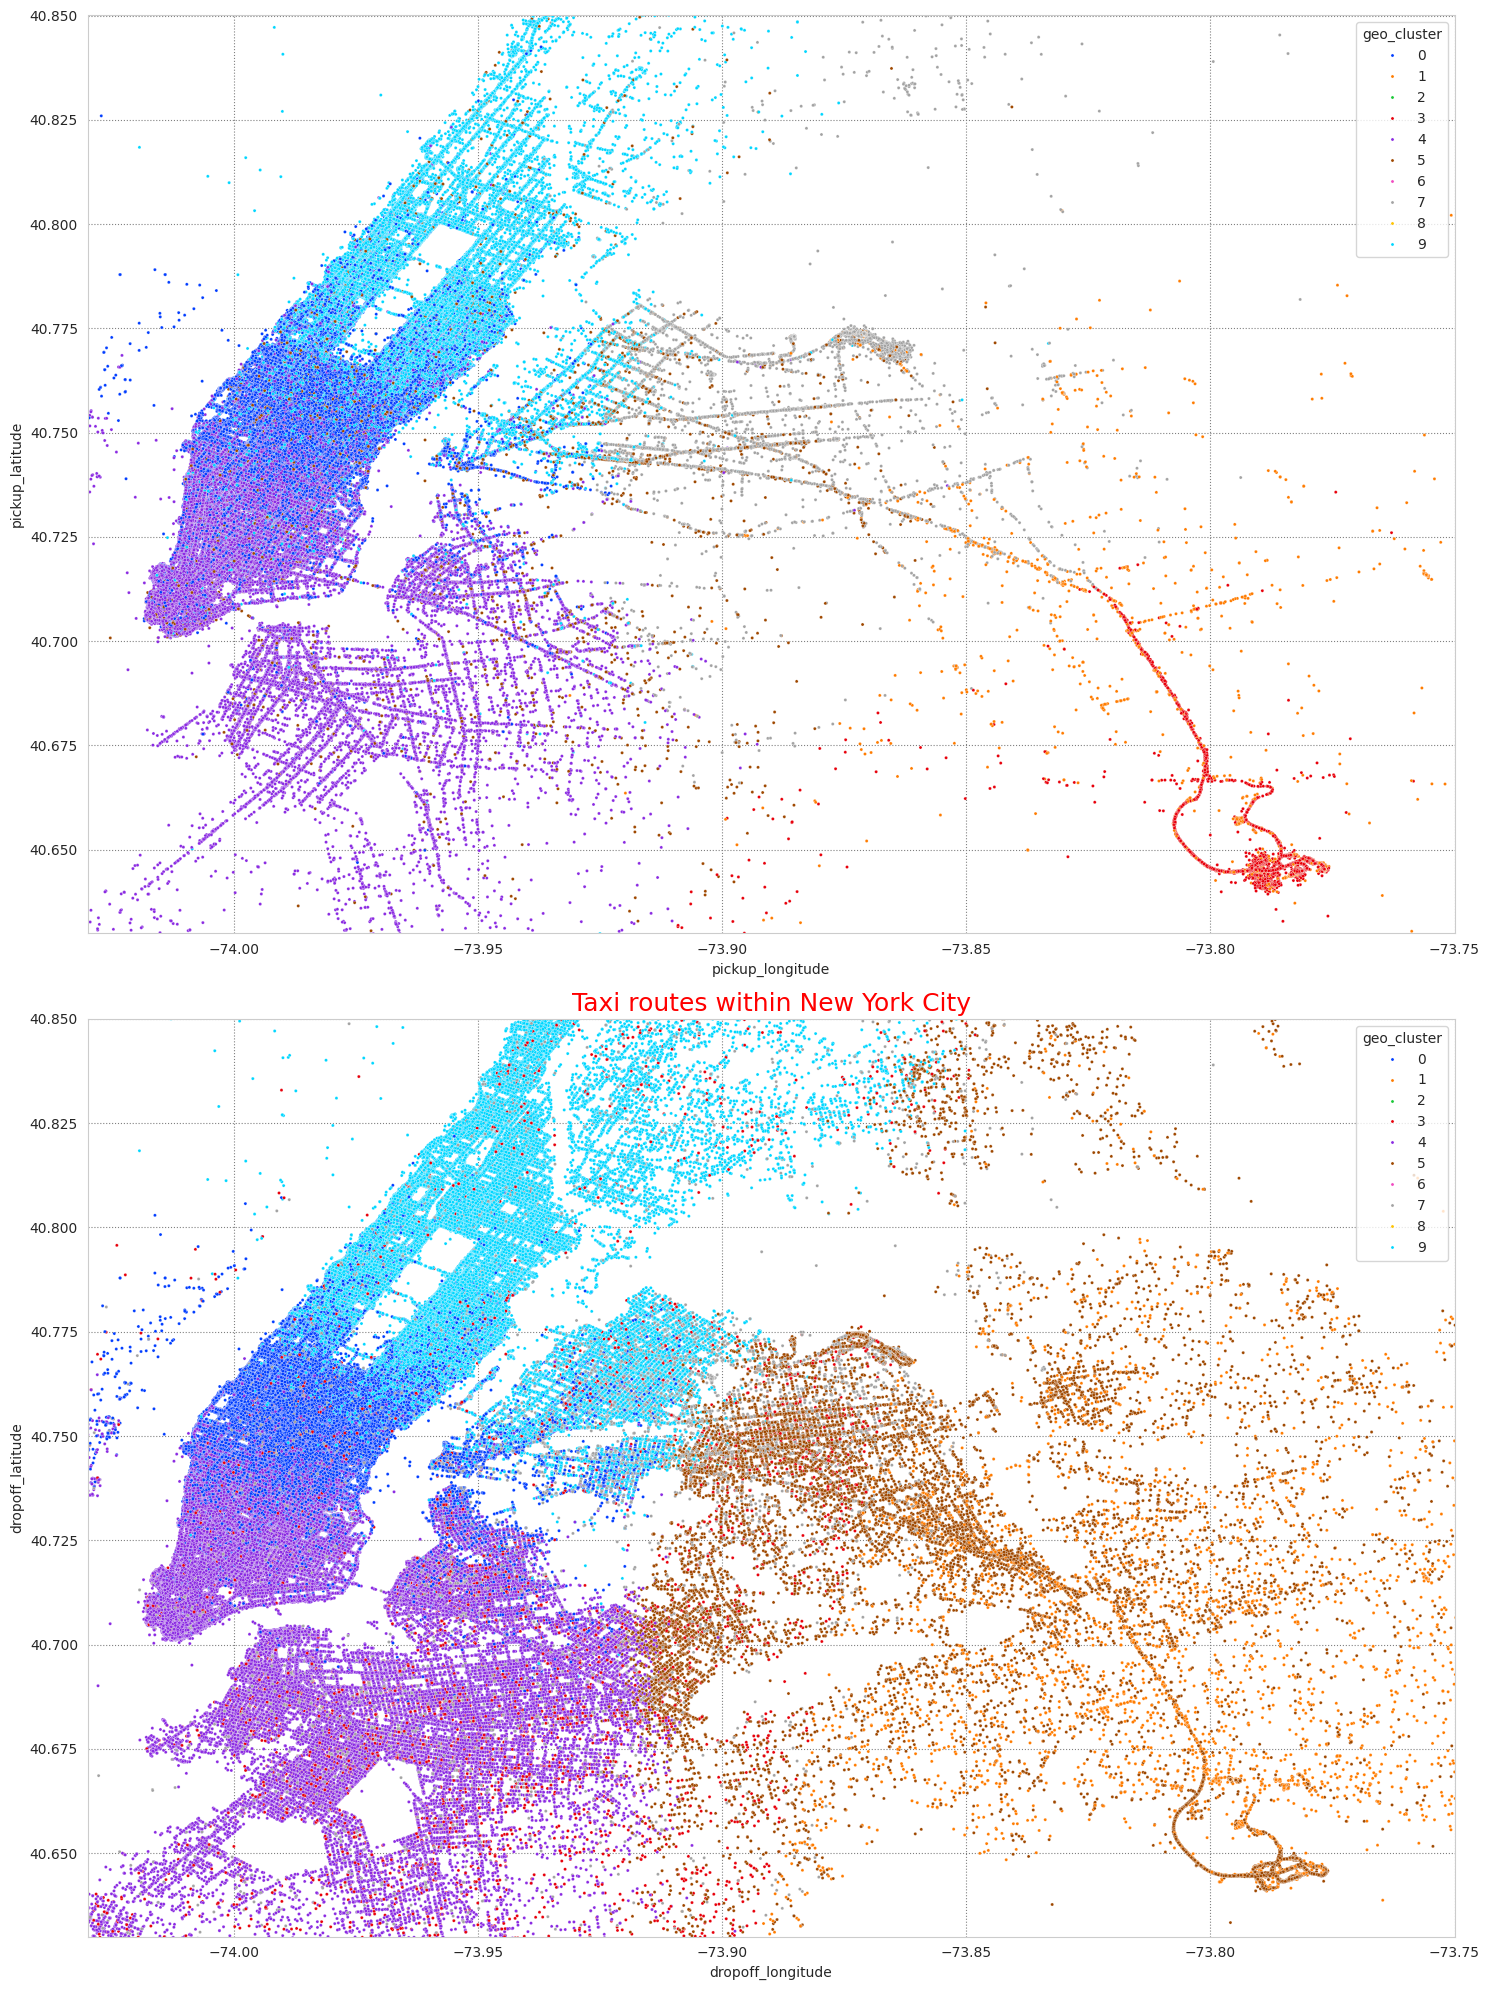

In [127]:
# создаем сводную таблицу
pivot = taxi_data.pivot_table(index='pickup_hour', columns='pickup_day_of_week', values='trip_duration', aggfunc='median')

fig = plt.figure(figsize=(10,10))
# отобразим полученную таблицу на тепловой карте
p = sns.heatmap(pivot, cmap='RdYlGn', annot=True, fmt='g')
p.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Median trip duration by day of week and time of day', fontsize=18, color='r')
plt.show()

city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

fig, ax = plt.subplots(2, figsize=(15,20))
# диаграмма рассеяния точек начала движения
sns.scatterplot(taxi_data, x='pickup_longitude', y='pickup_latitude', hue='geo_cluster', s=5, palette='bright', ax=ax[0])
ax[0].set(xlim=city_long_border, ylim=city_lat_border)
# диаграмма рассеяния точек завершения поездок
sns.scatterplot(taxi_data, x='dropoff_longitude', y='dropoff_latitude', hue='geo_cluster', s=5, palette='bright', ax=ax[1])
ax[1].set(xlim=city_long_border, ylim=city_lat_border)
plt.title('Taxi routes within New York City', fontsize=18, color='r')
plt.tight_layout()
plt.show()

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [128]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 32)
Columns: Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'trip_duration', 'pickup_date', 'pickup_hour',
       'pickup_day_of_week', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'windchill', 'heat index', 'humidity', 'pressure',
       'dew Point', 'visibility', 'wind dir', 'wind speed', 'gust speed',
       'precip', 'events', 'conditions', 'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [129]:
train_data = taxi_data.copy()
train_data.head()

vendor_id     pickup_datetime    dropoff_datetime  passenger_count  \
0          2 2016-03-14 17:24:55 2016-03-14 17:32:30                1   
1          1 2016-06-12 00:43:35 2016-06-12 00:54:38                1   
2          2 2016-01-19 11:35:24 2016-01-19 12:10:48                1   
3          2 2016-04-06 19:32:31 2016-04-06 19:39:40                1   
4          2 2016-03-26 13:30:55 2016-03-26 13:38:10                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

   trip_duration pickup_date  ...  pressure  dew Point  visibility  wind dir  \
0            455  2016-03-14  ...    1017.5        2.2         8.0       ENE   
1            663  2016-06-12  ...    1006.6       18.3        16.1      West   
2           2124  2016-01-19  ...    1016.3      -16.7        16.1      West   
3            429  2016-04-06  ...    1019.1       -6.1        16.1     South   
4            435  2016-03-26  ...    1026.9       -1.7        16.1  Variable   

   wind speed  gust speed  precip  events  conditions  trip_duration_log  
0        27.8        57.4     0.3    None    Overcast           6.122493  
1         7.4         0.0     0.0    None     Unknown           6.498282  
2        24.1        46.3     0.0    None       Clear           7.661527  
3        25.9        35.2     0.0    None       Clear           6.063785  
4         9.3         0.0     0.0    None       Clear           6.077642  

[5 rows x 32 columns]

## Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках.

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [130]:
train_data.drop(['dropoff_datetime', 'pickup_datetime', 'pickup_date'], axis=1, inplace=True)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 29)


### Задание 4.2.
Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 0, и 1 в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение "N", и 0 в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [131]:
train_data['vendor_id'] = train_data['vendor_id'].apply(lambda x: 0 if x==1 else 1)
# инициализируем кодировщик
# в параметрах указываем drop='first', чтобы удалять первый бинарный столбец и тем самым не создавать излишних признаков
# handle_unknown='ignore', чтобы код отрабатывал без ошибок в случае появления в тестовой выборке значений, отсутствующих в обучающей выборке
one_hot_encoder = preprocessing.OneHotEncoder(drop='first', handle_unknown='ignore')
data_onehot = one_hot_encoder.fit_transform(train_data[['pickup_day_of_week', 'geo_cluster', 'events']])
# создаем список закодированных имен столбцов
column_names = one_hot_encoder.get_feature_names_out()
# создаем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot.toarray(), columns=column_names)
print(data_onehot.shape)
data_onehot.head()

train_data = pd.concat([train_data.reset_index(drop=True).drop(['pickup_day_of_week', 'geo_cluster', 'events'], axis=1), data_onehot],
    axis=1)
print('Shape of data: {}'.format(train_data.shape))


(1458233, 18)
Shape of data: (1458233, 44)


### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, pickup_dropoff_cluster и events в таблице train_data с помощью OneHotEndoder() из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [132]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']


Добавим полученную таблицу с закодированными признаками:

In [ ]:
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot],
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [ ]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log.

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [ ]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log,
    test_size=0.33,
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


## Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [ ]:
selector = feature_selection.SelectKBest(feature_selection.f_regression, k=25)
selector.fit(X_train, y_train_log)
selected_cols = selector.get_feature_names_out().tolist()
selected_cols

# оставим в наших выборках только отобранные 25 факторов
X_train = X_train[selected_cols]
X_valid = X_valid[selected_cols]
print(X_train.shape, X_valid.shape)


Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов.


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [ ]:
scaler = preprocessing.MinMaxScaler()
# нормализуем тренировочную выборку
X_train = scaler.fit_transform(X_train)
# нормализуем валидационную выборку
X_valid = scaler.transform(X_valid)

## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train_log)
y_train_pred = lr_model.predict(X_train)
y_valid_pred = lr_model.predict(X_valid)
print('Train RMSLE: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred))))
print('Valid RMSLE: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred))))

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)
p = reg.predict(X_test)
mean_squared_error(y_test, p)

### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [ ]:
# создаем генератор полиномиальных признаков 2-й степени
poly =  preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)
# преобразуем выборки
X_train_poly = poly.transform(X_train)
X_valid_poly = poly.transform(X_valid)

# создаем модель линейной регрессии на полиномиальных признаках
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_poly, y_train_log)
y_train_poly_pred = lr_poly.predict(X_train_poly)
y_valid_poly_pred = lr_poly.predict(X_valid_poly)
print('Train RMSLE: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_poly_pred))))
print('Valid RMSLE: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_poly_pred))))

### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
# применим L2-регуляризацию, чтобы избежать переобучения модели
ridge = linear_model.Ridge(alpha=1)  # alpha - коэффициент регуляризации весов регрессии
ridge.fit(X_train_poly, y_train_log)
y_train_poly_pred = ridge.predict(X_train_poly)
y_valid_poly_pred = ridge.predict(X_valid_poly)
print('Train RMSLE: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_poly_pred))))
print('Valid RMSLE: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_poly_pred))))

### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [ ]:
tree_model = tree.DecisionTreeRegressor(random_state = 42)
tree_model.fit(X_train, y_train_log)
y_train_pred = tree_model.predict(X_train)
y_valid_pred = tree_model.predict(X_valid)
print('Train RMSLE: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred))))
print('Valid RMSLE: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred))))



### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений.

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


In [ ]:
# создаем списки для сохранения значений метрик и глубины дерева
errors_train = []
errors_valid = []
depth=[]
# в цикле проходим по различной глубине дерева
for i in range(7,20):
    dt_model= tree.DecisionTreeRegressor(max_depth=i, random_state=42)
    dt_model.fit(X_train, y_train_log)
    y_train_pred = dt_model.predict(X_train)
    y_valid_pred = dt_model.predict(X_valid)
    # сохраняем значения метрик на каждой итерации в списки
    errors_train.append(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)))
    errors_valid.append(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)))
    depth.append(i)

# создадим датафрейм со значениями ошибок в зависимости от глубины дерева
error_data = pd.DataFrame({'errors_train': errors_train, 'errors_valid': errors_valid}, index=depth)
print('Train & Valid RMSLE depend on depth of dt_model', error_data, sep='\n')

# визуализация ошибок на тренировочной и валидационной выборках
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(y=errors_train, x=depth, ax=ax)
sns.lineplot(y=errors_valid, x=depth, ax=ax)
plt.xlabel('Depth of tree')
plt.ylabel('RMSLE')
plt.xticks(range(7,20))
plt.yticks(np.linspace(0.35, 0.50, 10).round(2))
plt.legend(['Train', 'Valid'])
plt.show()

## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам.

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
rf_model = ensemble.RandomForestRegressor(n_estimators=200,           # количество деревьев
                                          max_depth=12,               # глубина дерева
                                          criterion='squared_error',  # критерий информативности
                                          min_samples_split = 20,     # минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться
                                          random_state=42)
rf_model.fit(X_train, y_train_log)
y_train_pred = rf_model.predict(X_train)
y_valid_pred = rf_model.predict(X_valid)
print('Train RMSLE: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred))))
print('Valid RMSLE: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred))))

### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6,
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
grad_boost = ensemble.GradientBoostingRegressor(learning_rate=0.5,      # темп(шаг) обучения
                                                n_estimators=100,       # количество деревьев
                                                max_depth=6,            # глубина дерева
                                                min_samples_split=30,   # минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться
                                                random_state=42)
grad_boost.fit(X_train, y_train_log)
y_train_pred = grad_boost.predict(X_train)
y_valid_pred = grad_boost.predict(X_valid)
print('Train RMSLE: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred))))
print('Valid RMSLE: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred))))



### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


In [ ]:
score_data = pd.DataFrame({
    'models': ['Линейная регрессия', 'Полиномиальная регрессия', 'Ридж-регрессия', 'Дерево решений',
               'Модель случайного леса', 'Градиентный бустинг'],
    'Train RMSLE': [0.53, 0.46, 0.47, 0.41, 0.40, 0.37],
    'Valid RMSLE': [0.53, 0.72, 0.48, 0.43, 0.41, 0.39]
    })
score_data.style.highlight_between(subset='Valid RMSLE', left=0.30, right=0.40, color='yellowgreen').format(precision=2)

### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


In [ ]:
fig = plt.figure(figsize=(10, 8))
features = selected_cols
feature_importance = grad_boost.feature_importances_
sns.barplot(y=features, x=feature_importance, palette='bright')
plt.show()

### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [ ]:
# переведем целевой признак в изначальное состояние
y_valid = np.exp(y_valid_log) - 1
y_pred = np.exp(y_valid_pred) - 1
print('Valid MeAE: {:.1f} min'.format(metrics.median_absolute_error(y_valid, y_pred)/60))

Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных.

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [ ]:
test_data = pd.read_csv("data/Project5_test_data.zip")
osrm_data_test = pd.read_csv("data/Project5_osrm_data_test.zip")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [ ]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_distance_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = clear_null_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot],
    axis=1
)
X_test = test_data[best_features]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [ ]:
# делаем предсказание для тестового набора данных
y_test_pred = grad_boost.predict(X_test)
# разлогарифмируем вектор предсказаний
y_test_predict = np.exp(y_test_pred) - 1

submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('data/submission_gb.csv', index=False)

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [ ]:
#!pip install xgboost
catboost

После чего модуль можно импортировать:

In [ ]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [ ]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_log, feature_names=best_features)
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid_log, feature_names=best_features)
dtest = xgb.DMatrix(X_test_scaled, feature_names=best_features)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [ ]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9,
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1,
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [ ]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)